# _<center> <font color = black>$ \texttt{ Omar Rashad Salem - Sheet 6 - Multimedia } $</font> </center>_

> ### <font color = red> Task 1: </font> 


 $$ \color{green} {Q =  |M| - \alpha Tr(M)^2  \\ \; \; {\scriptsize  \alpha = 0.06 \\ \color{green} \\ \;  , \; CRF_{th} = 30 }}$$ 



In [40]:
import cv2 
import numpy as np 
#task 1 o.r.s

#define gaussian partial derivatives
ix = np.asarray( [[0.0 , 0.0 ,0.0] , [-2 , 1.5 , -2] ,[2 , 0.2 , -0.1]] )
iy = np.asarray( [[0.0 , 0.0 ,0.0] , [0.2 , 2 , 0.2] ,[1.5 , 0.5 , 1.5]] )

#construct M matrix elements
ixix = np.vdot(ix , ix)
iyiy = np.vdot(iy , iy)
ixiy = np.vdot(ix , iy)
M = np.asarray([[ixix , ixiy] , [ixiy , iyiy]])

#calc the crf Q
detM = np.linalg.det(M)
TrM2 = (ixix + iyiy) ** 2 #squared M mat trace
alpha = 0.06 #given
CRFth = 30 #given
Q = detM - (alpha * TrM2) 


#answer
print (f" Q = {Q} \n ")

if Q >= CRFth :

    print( f" __ ACCEPTED! : this image window is a candidate corner __")
else :
    print ( " NOT ACCEPTED!")

#end-of-task 1 o.r.s

 Q = 67.64668600000003 
 
 __ ACCEPTED! : this image window is a candidate corner __


#### <font color = red> ✔️TASK1 ( _ANSWER_ ) : Q > threshold  , yes it's a candidate corner </font>

***

> ### <font color = red> Task 2: </font>


$$ \color{green} {Q =  |M| - \alpha Tr(M)^2  \; , \; {\scriptsize  \alpha = 0.04}} $$
$$ \\ \\\color{green}{R = \frac{\lambda_1  \lambda_2}{\lambda_1 + \lambda_2}} $$


#### <font color = red> ✔️TASK2 ( _ANSWER_ ) :</font>

$ Q_1 = 5 - 0.04(10.5)^2 = \color{green} {0.59  \; (vertical \; edge)} $
$\\ Q_2 = 45 - 0.04(14)^2 = \color{green} {37.16 \; (corner) \;} $
$\\ Q_3 = 1 {\scriptsize \times 10^-3} - 0.04(0.07)^2 = \color{green} {8.04 {\scriptsize  \ \times 10^-4} \; (none \; of \; them)}$
$\\ Q_4 = 2 - 0.04(20.1)^2 = \color{green}{-14.1604 \; (horizontal \; edge )}$
$$Q_{thresh} = 15 $$
$$$$
$\\[1cm] R_1 = \frac {5}{10.5} = \color{green} {0.4762} $
$\\[1.5ex] R_2 = \frac {45}{14} = \color{green} {3.214 }$
$\\[1.5ex] R_3 = \frac {0.02 \times 0.05}{0.07} = \color{green} {0.0143} $
$\\[1.5ex] R_4 = \frac {2}{20.1} = \color{green} {0.0995} $
$$R_{thresh} = 3.2 $$


***

> ### <font color = red>Task 3: </font>


#### <font color = red> ✔️( _ANSWER_ ) : </font>

   <center><font color = red >     
  the 8 bins of gradient orientation (Direction angle) Histogram </font></center>

       

***

> ### <font color = red> Task 4:</font>

 $$ \color{green}{ Threshold = 0.6} $$


#### <font color = red> ✔️( _ANSWER_ ) : </font>
$$ matches : \\ \color{green} {(p_1, q_1 )\; (p_2 , none) \; (p_3 , q_3)} $$


> ### <font color = red> Task 5:</font>


In [64]:
import cv2 
import numpy as np
#TASK 5 o.r.s

#import reference
ref_10p = cv2.imread("ref_10p.jpg")
ref_5p = cv2.imread("ref_5p.jpg")

#import test samples 
dhs10_tst = cv2.imread("10dhs_tst.jpg")
folded5p_tst = cv2.imread("5p_folded_tst.jpg")
old5p_tst = cv2.imread("old5p_tst.jpg")
many10p_tst = cv2.imread("10p_tst2.jpg")
good10p_tst = cv2.imread("10p_tst3.jpg")

sift_obj = cv2.SIFT_create()

#do SIFT for the reference images
kp_10p_ref , desc_10p_ref = sift_obj.detectAndCompute(ref_10p , None) 
kp_5p_ref , desc_5p_ref = sift_obj.detectAndCompute(ref_5p , None) 

#do sift for the test samples
kp_fold5p , desc_fold5p = sift_obj.detectAndCompute(folded5p_tst , None)
kp_old5p , desc_old5p = sift_obj.detectAndCompute(old5p_tst , None)
kp_many10p , desc_many10p = sift_obj.detectAndCompute(many10p_tst , None)
kp_good10p , desc_good10p = sift_obj.detectAndCompute(good10p_tst , None)

kp_tst_ls = [kp_fold5p , kp_old5p , kp_many10p , kp_good10p] #or use dict
desc_tst_ls = [ desc_fold5p , desc_old5p , desc_many10p , desc_good10p  , desc_5p_ref ,desc_10p_ref]

#create match objects
mathcer = cv2.BFMatcher(cv2.NORM_L2)
# matched_with_5p = mathcer.match( desc_5p_ref , desc_5p_ref )
# matched_with_10p = mathcer.match( desc_10p_ref , desc_10p_ref )

mathcer2 = cv2.BFMatcher(cv2.NORM_L2)

#TESTING WITH DIFF SAMPLES
for i in range(len(desc_tst_ls)):

    #get matches with the ref 5p
    matched_with_5p = mathcer.match( desc_5p_ref , desc_tst_ls[i] )
    matched_with_5p = sorted( matched_with_5p , key = lambda x : x.queryIdx )

    #get the matches with the ref 10p
    matched_with_10p = mathcer.match( desc_10p_ref , desc_tst_ls[i] )
    matched_with_10p = sorted( matched_with_10p , key = lambda x : x.queryIdx )

    #smaller sum is the supposed righ match
    sum_10p , sum_5p = 0 , 0
    for j in range(len(matched_with_5p)): #take same number of features from both
        if matched_with_10p[j].distance < matched_with_5p[j].distance :
            sum_5p += 1
        elif matched_with_10p[j].distance > matched_with_5p[j].distance :
            sum_10p += 1
        else :
            sum_10p += 1
            sum_5p += 1

    # compare to find the supposed right  match
    if sum_10p > sum_5p :
        print (f"test {i} : is a 5 pounds bill")
    elif sum_10p < sum_5p :
        print(f"test {i} : is a 10 pounds bill")
    else:
        print(f"test {i} couldn't decide")

        #TODO : add thresh hold later do detect it neither of them

# cv2.waitKey(0) 
#END TASK 5 o.r.s

test 0 : is a 5 pounds bill
test 1 : is a 5 pounds bill
test 2 : is a 10 pounds bill
test 3 : is a 10 pounds bill
test 4 : is a 5 pounds bill
test 5 : is a 10 pounds bill


## USED images:


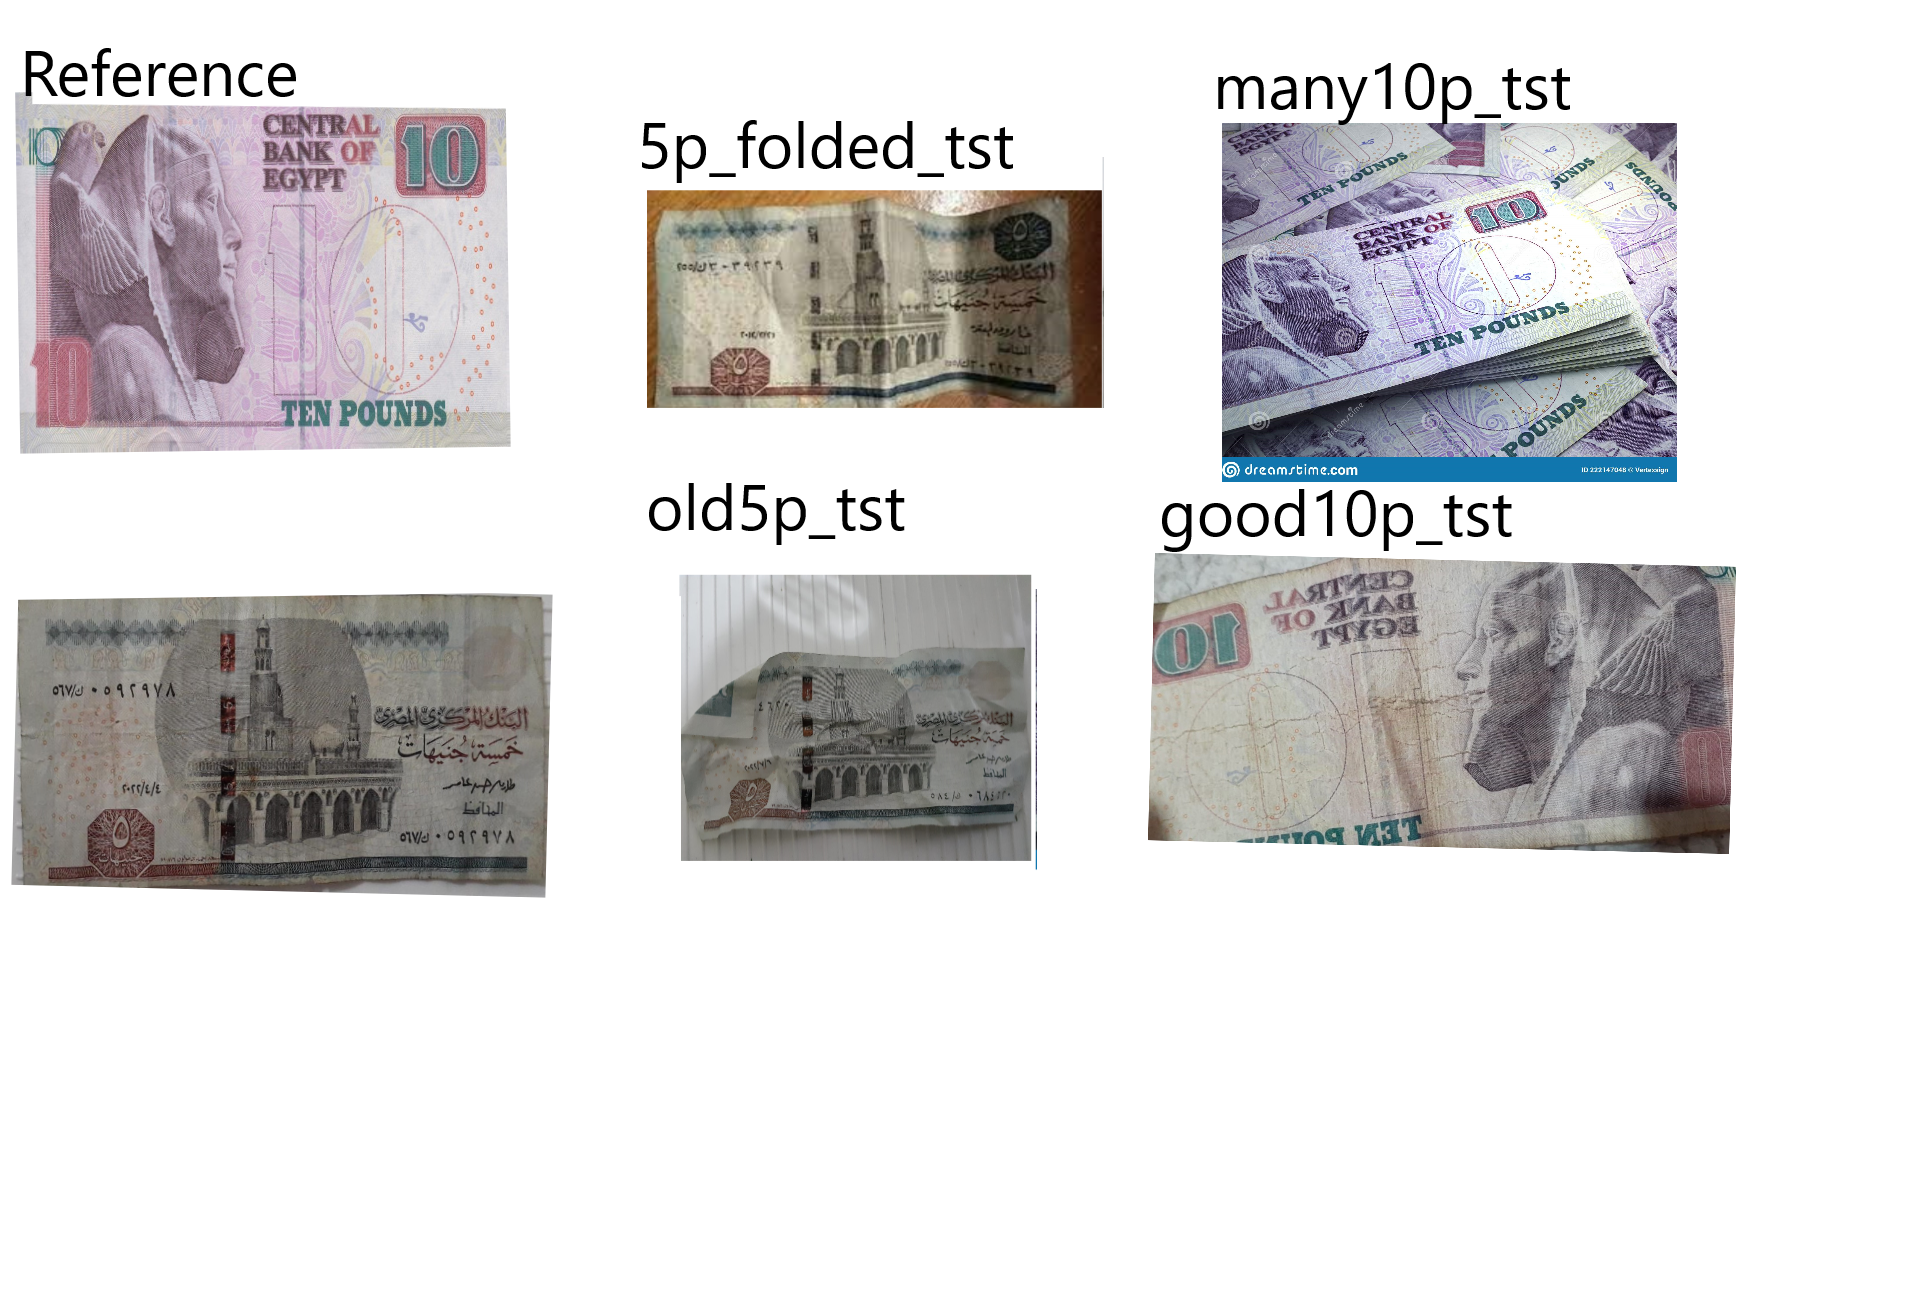

In [70]:
from IPython import display
display.Image("all.png")


$$ END-OF-SHEET_6-MULTIMEDIA $$